# Boston Housing Dataset

This Project aims at predicting the monetary value of houses located in Boston.

This dataset for this can be imported from sklearn library and can also be downloaded from https://www.kaggle.com/datasets. It consists of 506 rows, where each row represents a region with values to various features like

CRIM ->per capita crime rate by town

ZN ->proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS ->proportion of non-retail business acres per town

CHAS-> Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX-> nitric oxides concentration (parts per 10 million)

RM-> average number of rooms per dwelling

AGE-> proportion of owner-occupied units built prior to 1940

DIS-> weighted distances to five Boston employment centres

RAD-> index of accessibility to radial highways

TAX-> full-value property-tax rate per10,000

𝑃𝑇𝑅𝐴𝑇𝐼𝑂 ->𝑝𝑢𝑝𝑖𝑙−𝑡𝑒𝑎𝑐ℎ𝑒𝑟 𝑟𝑎𝑡𝑖𝑜 𝑏𝑦 𝑡𝑜𝑤𝑛

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [2]:
#load the dataset
boston = load_boston()

In [3]:
df = pd.DataFrame(boston.data)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


- CRIM per capita crime rate by town 
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town 
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
- NOX nitric oxides concentration (parts per 10 million) 
- RM average number of rooms per dwelling 
- AGE proportion of owner-occupied units built prior to 1940 
- DIS weighted distances to five Boston employment centres 
- RAD index of accessibility to radial highways 
- TAX full-value property-tax rate per $10,000 
- PTRATIO pupil-teacher ratio by town 
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
- LSTAT % lower status of the population 
- MEDV Median value of owner-occupied homes in $1000's

In [5]:
#set the target variable
df['Price'] = boston.target

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df.shape

(506, 14)

# Evaluation Metrics

We will calculate the coefficient of determination, R2, and mean squared error to quantify our model's performance.

R2 score explains how much variance in the target variable is explained by the predictor variables. It varies between 0 and 1. A R2 score of 0 tells us that out prediction is no better than mean of the target variable.

Mean squared error is the average of squared distances between the actual and predicted values.

# Data preprocessing

As a data preprocessing step we carry out the following steps:

1) check if there are any missing values

2) check the datatypes of indiviual features (to avoid calculation error when there is mismatch in the datatypes)

3)Have an overall understanding regarding statistics of the dataset

In [8]:
#check for missing valuse
df.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
Price    0
dtype: int64

In [9]:
#check the datatype
df.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
5        float64
6        float64
7        float64
8        float64
9        float64
10       float64
11       float64
12       float64
Price    float64
dtype: object

In [10]:
#check for statistics 
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
#Defining predictor and target variable
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
Y.shape
X.shape

(506, 13)

In [12]:
#Spliting the dataset into training and test sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, random_state=1)
print(X_train)

          0     1      2    3      4      5     6       7     8      9     10  \
13   0.62976   0.0   8.14  0.0  0.538  5.949  61.8  4.7075   4.0  307.0  21.0   
61   0.17171  25.0   5.13  0.0  0.453  5.966  93.4  6.8185   8.0  284.0  19.7   
377  9.82349   0.0  18.10  0.0  0.671  6.794  98.8  1.3580  24.0  666.0  20.2   
39   0.02763  75.0   2.95  0.0  0.428  6.595  21.8  5.4011   3.0  252.0  18.3   
365  4.55587   0.0  18.10  0.0  0.718  3.561  87.9  1.6132  24.0  666.0  20.2   
..       ...   ...    ...  ...    ...    ...   ...     ...   ...    ...   ...   
255  0.03548  80.0   3.64  0.0  0.392  5.876  19.1  9.2203   1.0  315.0  16.4   
72   0.09164   0.0  10.81  0.0  0.413  6.065   7.8  5.2873   4.0  305.0  19.2   
396  5.87205   0.0  18.10  0.0  0.693  6.405  96.0  1.6768  24.0  666.0  20.2   
235  0.33045   0.0   6.20  0.0  0.507  6.086  61.5  3.6519   8.0  307.0  17.4   
37   0.08014   0.0   5.96  0.0  0.499  5.850  41.5  3.9342   5.0  279.0  19.2   

         11     12  
13   3

# Linear Regression 

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [14]:
#creating the regressor object
regressor = LinearRegression()

In [15]:
#Fitting the model
regressor.fit(X_train,Y_train)

LinearRegression()

In [16]:
#Listing all the coefficients of features
coefData = pd.DataFrame([X_train.columns,regressor.coef_]).T
coefData = coefData.rename(columns={0: 'Predictors', 1: 'betaCoefficients'})
coefData

,Predictors,betaCoefficients
0,0.0,-0.098542
1,1.0,0.060784
2,2.0,0.059172
3,3.0,2.439560
4,4.0,-21.469965
5,5.0,2.795814
6,6.0,0.003575
7,7.0,-1.516272
8,8.0,0.307542
9,9.0,-0.011280


In [17]:
regressor.intercept_

46.39649387182395

In [18]:
#Evaluating training Data
y_pred = regressor.predict(X_train)

In [19]:
r2_Score = r2_score(Y_train,y_pred)
MSE = mean_squared_error(Y_train,y_pred)
metrics = pd.DataFrame({
    'Metrics' : ['R2_Score','MSE'],
    'Values':[r2_Score,MSE]})
metrics

,Metrics,Values
0,R2_Score,0.710388
1,MSE,23.513334


# Linear Regression Assumptions

There are ceratin assumptions to be followed before applying Linear Regression, We will check if these assumptions hold for this project  

1) There should be linear relationship between dependent and independent variable

2)There should be no or little multicolliniearity between the features.If the two variables x1 and x2 are exactly similar it will be difficult to determine the coeffients Beta 1 and Beta 2 which makes the model unstable. 

3)Homosedacity: Constant variance of residulals. The residuals must be uniformly distributed

4)The error epsilon should be normally distributed.



<AxesSubplot:>

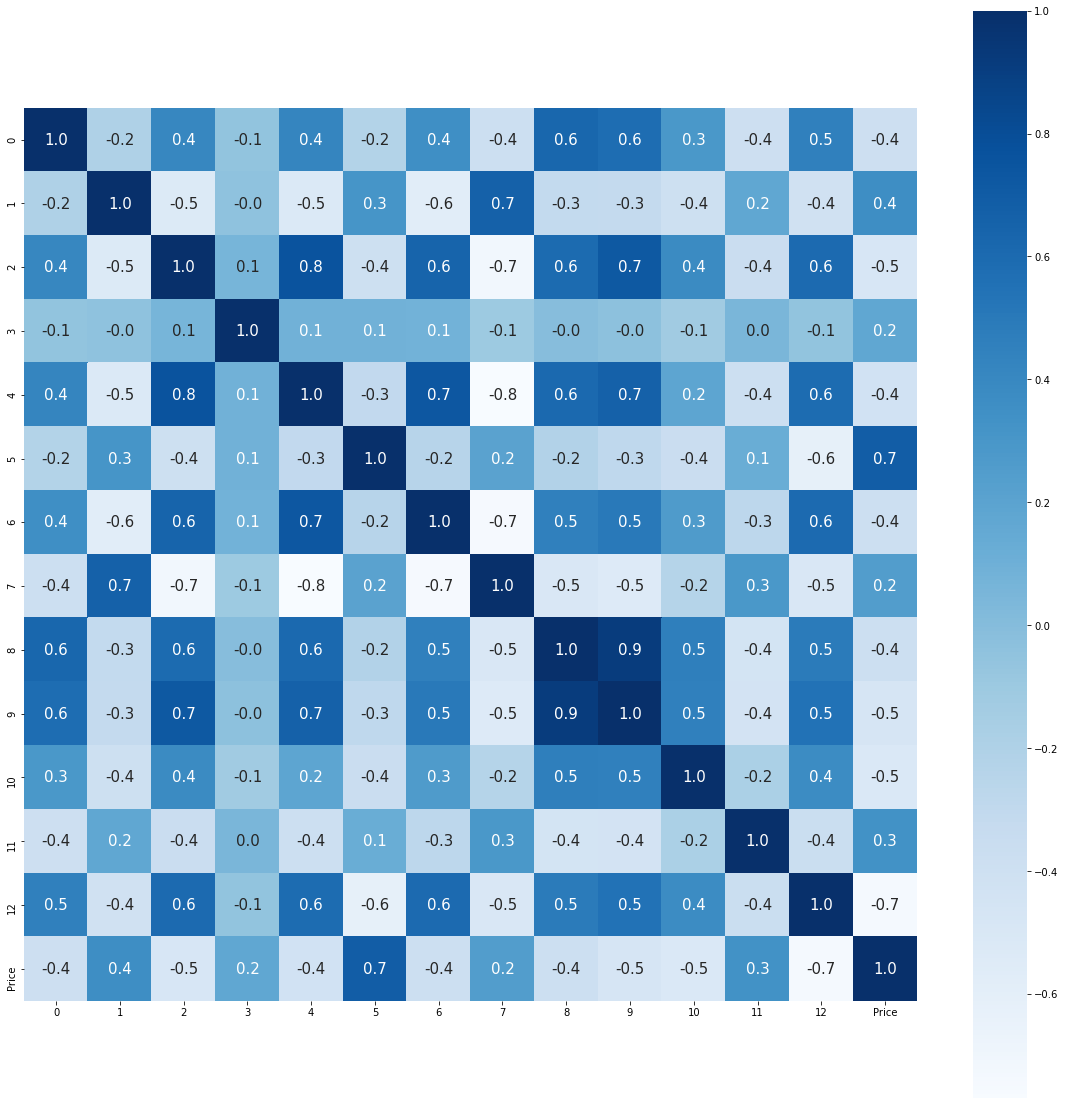

In [20]:
#1) There is  a linear relationship between predictor and target variables
#2) There is no or little multicolliniarity
#check if there are any correlated independent variables
corrData = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrData, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

C:\Users\Pavithre B Shetty\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


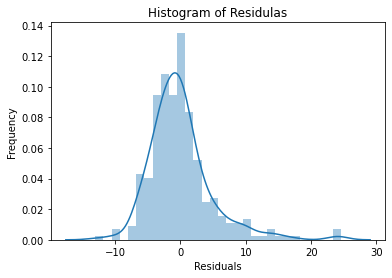

In [21]:
#3) Errors are normally distributed
sns.distplot(Y_train -y_pred)
plt.title("Histogram of Residulas")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


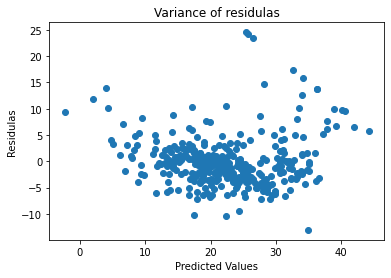

In [22]:
#4) Constant variance of residulas
plt.scatter(y_pred, Y_train - y_pred)
plt.title("Variance of residulas")
plt.xlabel("Predicted Values")
plt.ylabel("Residulas")
plt.show()

In [23]:
#Model Evaluation on test set
y_pred = regressor.predict(X_test)
r2_Score_lin = r2_score(Y_test,y_pred)
MSE = mean_squared_error(Y_test,y_pred)
metrics = pd.DataFrame({
    'Metrics' : ['R2_Score','MSE'],
    'Values':[r2_Score,MSE]})
metrics

,Metrics,Values
0,R2_Score,0.710388
1,MSE,19.831324


In [24]:
#Making a single prediction
print(regressor.predict([[0.00632,18,2.31,0,0.538,6.575,65,4.9,1,290,18,396,4.98]]))

[25.92034021]


# Polynomial Regression


In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
polyReg = PolynomialFeatures(degree=2)
X_train_poly = polyReg.fit_transform(X_train)
X_test_poly = polyReg.fit_transform(X_test)
regressorPoly = LinearRegression()

In [27]:
regressorPoly.fit(X_train_poly,Y_train)
y_pred = regressorPoly.predict(X_train_poly)

In [28]:
#Model Evaliation for training set
r2_Score = r2_score(Y_train,y_pred)
MSE = mean_squared_error(Y_train,y_pred)
metrics = pd.DataFrame({
    'Metrics' : ['R2_Score','MSE'],
    'Values':[r2_Score,MSE]})
metrics


,Metrics,Values
0,R2_Score,0.931522
1,MSE,5.559695


In [29]:
#Model Evaluation on Test set
y_pred = regressorPoly.predict(X_test_poly)
r2_Score_poly = r2_score(Y_test,y_pred)
MSE = mean_squared_error(Y_test,y_pred)
metrics = pd.DataFrame({
    'Metrics' : ['R2_Score','MSE'],
    'Values':[r2_Score_poly,MSE]})
metrics

,Metrics,Values
0,R2_Score,0.804380
1,MSE,17.929415


In [30]:
#Making a single prediction
print(regressorPoly.predict(polyReg.fit_transform([[0.00632,18,2.31,0,0.538,6.575,65,4.9,1,290,18,396,4.98]])))

[19.65131884]


# Decision trees

Decision tree algorithm is sensitive to overfitting.

One way to overcome this is to check for the optimal value for max_depth.
Here we will use GridSearch to find the best value of max_depth parameter

In [31]:
from sklearn.tree import DecisionTreeRegressor

def GridSearch(X, y):
    """Finding the best parameter for max_depth to avoid overfitting issues"""

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state = 1)

    #set appropriate parameter
    parameters = {'max_depth':range(1,11)}

    #set r2_score as evaluation metrics
    scoring_function = make_scorer(r2_score)

   
    gridSearch = GridSearchCV(regressor, param_grid=parameters, scoring=scoring_function,cv=10)
    gridSearch.fit(X,y)

   
    return gridSearch.best_estimator_

reg = GridSearch(X_train, Y_train)
print(reg)

DecisionTreeRegressor(max_depth=6, random_state=1)


In [32]:
regressorTree = DecisionTreeRegressor(random_state = 1,max_depth=6)
regressorTree.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=6, random_state=1)

In [33]:
#Evaluating training dataset
y_pred = regressorTree.predict(X_train)
r2_Score = r2_score(Y_train,y_pred)
MSE = mean_squared_error(Y_train,y_pred)
metrics = pd.DataFrame({
    'Metrics' : ['R2_Score','MSE'],
    'Values':[r2_Score,MSE]})
metrics


,Metrics,Values
0,R2_Score,0.948565
1,MSE,4.175946


In [34]:
#Evaluating test set
y_pred = regressorTree.predict(X_test)
r2_Score_Tree = r2_score(Y_test,y_pred)
MSE = mean_squared_error(Y_test,y_pred)
metrics = pd.DataFrame({
    'Metrics' : ['R2_Score','MSE'],
    'Values':[r2_Score_Tree,MSE]})
metrics

,Metrics,Values
0,R2_Score,0.847725
1,MSE,13.956702


In [35]:
print(regressorTree.predict([[0.00632,18,2.31,0,0.538,6.575,65,4.9,1,290,18,396,4.98]]))

[22.93333333]


# Random Forest

We can find the best values for hyperparameters to get optimal results.

RandomForest algorithm has several hyperparameters which we can tune. In this project we will use Grid search method to find
optimal values for the following features:

n_estimators = number of trees in the foreset

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split

min_samples_leaf = min number of data points allowed in a leaf node


In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
def GridSearch(X, y):
    """Tuning the hyperparamenters to find the best set of parameters"""

    # Create a RandomForest regressor object
    regressor = RandomForestRegressor()

    #set appropriate parameter
    parameters = {
    'max_depth': [3,5,7,10],
    'min_samples_split': range(8,11),
    'min_samples_leaf': [3, 4, 5],
    'n_estimators':[10,20,50,100]}

    #set r2_score as evaluation metrics
    scoring_function = make_scorer(r2_score)

   
    gridSearch = GridSearchCV(regressor, param_grid=parameters, scoring=scoring_function,cv=10)
    gridSearch.fit(X,y)

   
    return gridSearch.best_estimator_

reg = GridSearch(X_train, Y_train)
print(reg)

RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=10)


In [48]:
regressorForest = RandomForestRegressor(n_estimators= 10,max_depth=7,min_samples_leaf=3, min_samples_split=10)

In [49]:
regressorForest.fit(X_train,Y_train)

RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=10,
                      n_estimators=10)

In [50]:
#Model Evaluation for tarining dataset
y_pred = regressorForest.predict(X_train)
r2_Score = r2_score(Y_train,y_pred)
MSE = mean_squared_error(Y_train,y_pred)
metrics = pd.DataFrame({
    'Metrics' : ['R2_Score','MSE'],
    'Values':[r2_Score,MSE]})
metrics

,Metrics,Values
0,R2_Score,0.931761
1,MSE,5.540235


In [51]:
#Model Evaluation for test dataset
y_pred = regressorForest.predict(X_test)
r2_Score_forest = r2_score(Y_test,y_pred)
MSE = mean_squared_error(Y_test,y_pred)
metrics = pd.DataFrame({
    'Metrics' : ['R2_Score','MSE'],
    'Values':[r2_Score,MSE]})
metrics

,Metrics,Values
0,R2_Score,0.931761
1,MSE,11.306406


In [52]:
#Making single prediction
print(regressorForest.predict([[0.00632,18,2.31,0,0.538,6.575,65,4.9,1,290,18,396,4.98]]))

[25.49750267]


# XGBoost

In [43]:
from xgboost import XGBRegressor

In [44]:
regressorBoost = XGBRegressor()
regressorBoost.fit(X_train,Y_train)
Y_train

[13:09:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


13     20.4
61     16.0
377    13.3
39     30.8
365    27.5
       ... 
255    20.9
72     22.8
396    12.5
235    24.0
37     21.0
Name: Price, Length: 354, dtype: float64

In [45]:
#Model Evaluation for tarining dataset
y_pred = regressorBoost.predict(X_train)
r2_Score = r2_score(Y_train,y_pred)
MSE = mean_squared_error(Y_train,y_pred)
metrics = pd.DataFrame({
    'Metrics' : ['R2_Score','MSE'],
    'Values':[r2_Score,MSE]})
metrics

,Metrics,Values
0,R2_Score,0.977409
1,MSE,1.834156


In [46]:
#Model Evaluation for test dataset
y_pred = regressorBoost.predict(X_test)
r2_Score_boost = r2_score(Y_test,y_pred)
MSE = mean_squared_error(Y_test,y_pred)
metrics = pd.DataFrame({
    'Metrics' : ['R2_Score','MSE'],
    'Values':[r2_Score,MSE]})
metrics

,Metrics,Values
0,R2_Score,0.977409
1,MSE,7.040963


In [59]:
#making a single prediction
values = pd.DataFrame([0.00632,18,2.31,0,0.538,6.575,65,4.9,1,290,18,396,4.98]).T
# values = values.rename(columns={0:'CRIM', 1:'ZN', 2:'INDUS', 3:'CHAS', 4:'NOX', 5:'RM', 6:'AGE', 7:'DIS', 8:'RAD', 9:'TAX', 10:'PTRATIO', 11:'B', 12:'LSTAT'})
print(regressorBoost.predict(values))

[24.538128]


# Model Comparison

In [56]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Polynomial Regression', 'Random Forest', 'XGBoost','Decision Tree'],
    'R-squared Score': [r2_Score_lin*100,r2_Score_poly*100, r2_Score_forest*100, r2_Score_boost*100,r2_Score_Tree*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
3,XGBoost,92.317929
2,Random Forest,87.664100
4,Decision Tree,84.772484
1,Polynomial Regression,80.438039
0,Linear Regression,78.362954
